<a href="https://colab.research.google.com/github/thugge254/Natural-Language-Processing/blob/main/Quora_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with Bag of Words

Outline:

    - Download and explore the data
    - Apply text preprocessing techniques
    - Implement the bag of words model
    - Train ML model for classification
    - Make predictions and submit to Kaggle


## Download and Explore the data

Outline:

1. Download the dataset from Kaggle to Colab
2. Explore the data using the Pandas Package
3. Create a small working sample

Download The data to Colab

In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [6]:
!ls

data  kaggle.json  sample_data


In [4]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 1.10GB/s]


In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 780MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 553MB/s]


#### Explore the Data Using Pandas

In [25]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
raw_df = pd.read_csv(train_fname)

In [29]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
raw_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
raw_df.shape

(1306122, 3)

In [53]:
sincere_df = raw_df[raw_df.target == 0]

In [54]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [49]:
insincere_df = raw_df[raw_df.target == 1]

In [50]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

#### Distribution of Sincere and Insencere Questions

In [ ]:
raw_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

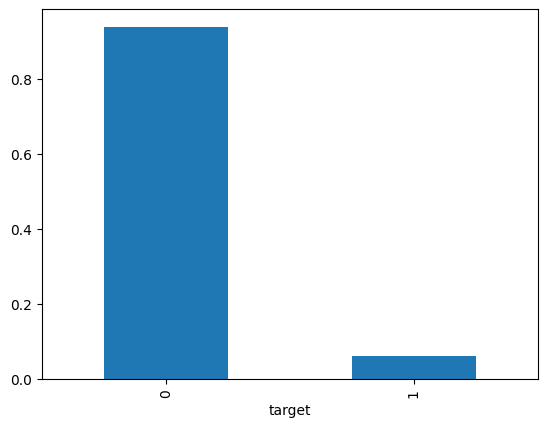

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

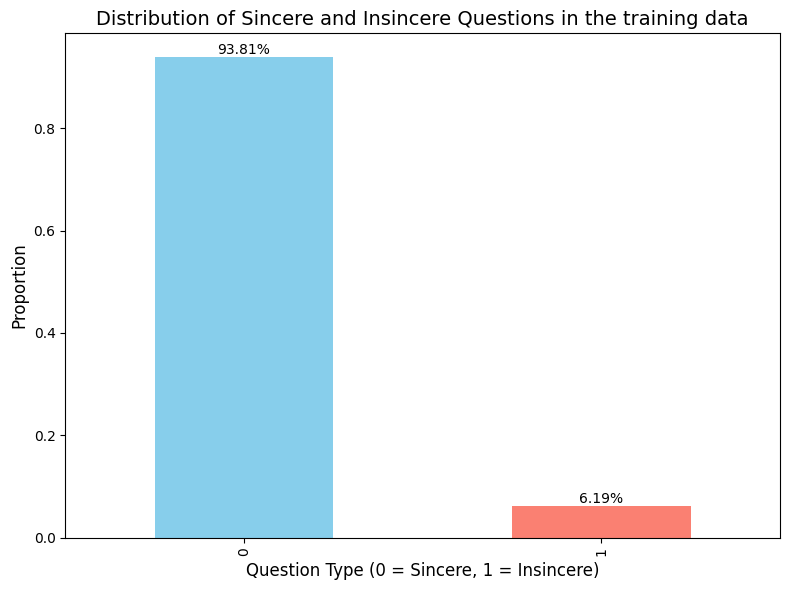

In [ ]:
# Create the bar plot object
ax = raw_df.target.value_counts(normalize=True).plot(
    kind='bar',
    color=['skyblue', 'salmon'],  # colors for bars
    figsize=(8, 6)
)

# Add title and axis labels
ax.set_title('Distribution of Sincere and Insincere Questions in the training data', fontsize=14)
ax.set_xlabel('Question Type (0 = Sincere, 1 = Insincere)', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)

# Show percentage values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
test_df = pd.read_csv(test_fname)

In [ ]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [ ]:
test_df.shape

(375806, 2)

In [ ]:
sub_df = pd.read_csv(sample_fname)

In [ ]:
sub_df.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [ ]:
sub_df.shape

(375806, 2)

In [ ]:
sub_df.prediction.value_counts(normalize=True)

,proportion
prediction,
0,1.0


#### Create a Working Sample

In [44]:
SAMPLE_SIZE = 100_000

In [45]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)

In [46]:
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [47]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Pre-Processing techniques

Outline:

1. Understanding the Bag of Words Model
2. Tokenization
3. Stop Words removal
4. Stemming

## Bag of words intuition

1. Create a list of all the words across all the text document.

2. Convert each document (Question) in to a vector containing the counts of each word.


Limitations

1. There may be too many words in the dataset - The vector may not fit in the memory

2. Some words may occure too frequentlly

3. Some words may occure vey rarely or only once - It may not give enough information the calassify the word appropriately

4. A single word may have many forms (go,gone,going bird vs birds)

## Tokenization

Splitting a document in to words and separators

In [55]:
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [70]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

In [58]:
from nltk.tokenize import word_tokenize

In [59]:
import nltk

In [60]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [56]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [61]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
word_tokenize("Spilled drinks, dust buildup, and overall wear and tear")

['Spilled',
 'drinks',
 ',',
 'dust',
 'buildup',
 ',',
 'and',
 'overall',
 'wear',
 'and',
 'tear']

In [ ]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [71]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### Stop Word Removal

Removuing commonly occuring words

In [72]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [73]:
from nltk.corpus import stopwords

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
english_stopwords = stopwords.words("english")
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [76]:
", ".join(english_stopwords)

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [77]:
def remove_stopwords(tokens):
  return[word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [78]:
q0_stp = remove_stopwords(q0_tok)
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [79]:
q1

'Has the United States become the largest dictatorship in the world?'

In [80]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming

Stemming is the process of reducing a word to its root form. The idea is to chop off suffixes (and sometimes prefixes) so that related words map to the same root, even if they don’t form a proper word.

Example:

Words: "playing", "played", "plays"

Stemmed form: "play"

In [18]:
from nltk.stem.snowball import SnowballStemmer

In [19]:
stemmer = SnowballStemmer(language="english")

In [20]:
stemmer.stem("playing")

'play'

In [ ]:
stemmer.stem("gone")

'gone'

In [ ]:
stemmer.stem("swimming")

'swim'

In [ ]:
stemmer.stem("dancing")

'danc'

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [ ]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatizasion

Lemmatization is the process of reducing a word to its base or dictionary form (lemma), but unlike stemming, it uses linguistic knowledge such as the word's part of speech and context to make sure the result is an actual word.

"Love"-> "Love"
"Loving"->"Love"
"Lovable"->"Love"

## Implement Bag of Words Model

Outline:

1. Create a vocabulary using Count Vectorizer

2. Transform text to Vectors using Count Vectorizer

3. Configure text Preprocessing in Count Vectorizer

#### Create a Vocabullary

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
small_df = sample_df[:5]

In [65]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [ ]:
sample_df

,qid,question_text,target
29166,05b3ff6315935e57ac10,I have a crush in my college class. We texted ...,0
509551,63c7fe7248aeaf259cc5,What would Trump do if Twitter was hacked and ...,0
441683,568ecc00d3d949205436,Which words would best describe your stay in M...,0
827831,a23d99ecf8a860654d9b,Where can I get the watch that Kamal wears in ...,0
491884,6052a164059b35681aae,Does a fatty person say (160pounds) requires a...,0
...,...,...,...
1007264,c560f8186ca1e9e437fc,Why do Mexican men reject Asian women?,0
198029,26b62edc3af2bfa4fa04,Is depression warm or cold?,0
727240,8e657251c7c04d5bf5cc,Why are the liberals freaking out over Trump i...,1
1078566,d35c03d36cc098c1b297,Do you think kindergarten/preschool teachers s...,0


In [84]:
small_vect = CountVectorizer()

In [85]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [86]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [87]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform document into Vectors

In [88]:
vectors = small_vect.transform(small_df.question_text)
vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 56 stored elements and shape (5, 51)>

In [89]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

In [90]:
vectors.shape

(5, 51)

In [43]:
small_df.question_text.values[0]

"I have a crush in my college class. We texted each other for the first time and replied very fast & happily. But the next day she didn't text me at all. Should I initiate, or wait for her?"

In [91]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [92]:
vectors[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0]])

### Configure Count Vectorizer Parameters

In [96]:
stemmer = SnowballStemmer(language='english')

In [97]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [99]:
tokenize('what is the really (dealing) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [103]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [104]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 27 s, sys: 2.92 ms, total: 27 s
Wall time: 27.2 s


CountVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x796b9d28f240>)

In [105]:
len(vectorizer.vocabulary_)

1000

In [107]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [108]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 28.9 s, sys: 142 µs, total: 28.9 s
Wall time: 30.5 s


In [109]:
inputs.shape

(100000, 1000)

In [112]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [111]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## ML Model for Text Classification

## Make Predictions and Submit to Kaggle